---
format:
  html:
    self-contained: true
---

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
# Code
!pip install palmerpenguins
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from palmerpenguins import load_penguins
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

penguins = load_penguins()
penguins = penguins.dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [ ]:
X = penguins[['species', 'island', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
y = penguins['bill_depth_mm']

X_encoded = pd.get_dummies(X, columns=['species', 'island', 'sex'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']])
X_test = scaler.transform(X_test[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']])

errors = []

In [ ]:
#Linear Model
lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)
y_pred = lr_fit.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse)
errors.append(mse)

2.631098183285388


In [ ]:
#KNN Model with K = 3
K = 3
knn_model = KNeighborsRegressor(n_neighbors=K)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse)
errors.append(mse)

1.362305140961858


In [ ]:
#KNN Model with K = 5
K = 5
knn_model = KNeighborsRegressor(n_neighbors=K)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse)
errors.append(mse)

1.3001194029850751


In [ ]:
#Decision Tree
decision_tree_model = DecisionTreeRegressor(random_state=1)
decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse)
errors.append(mse)

2.3068656716417912


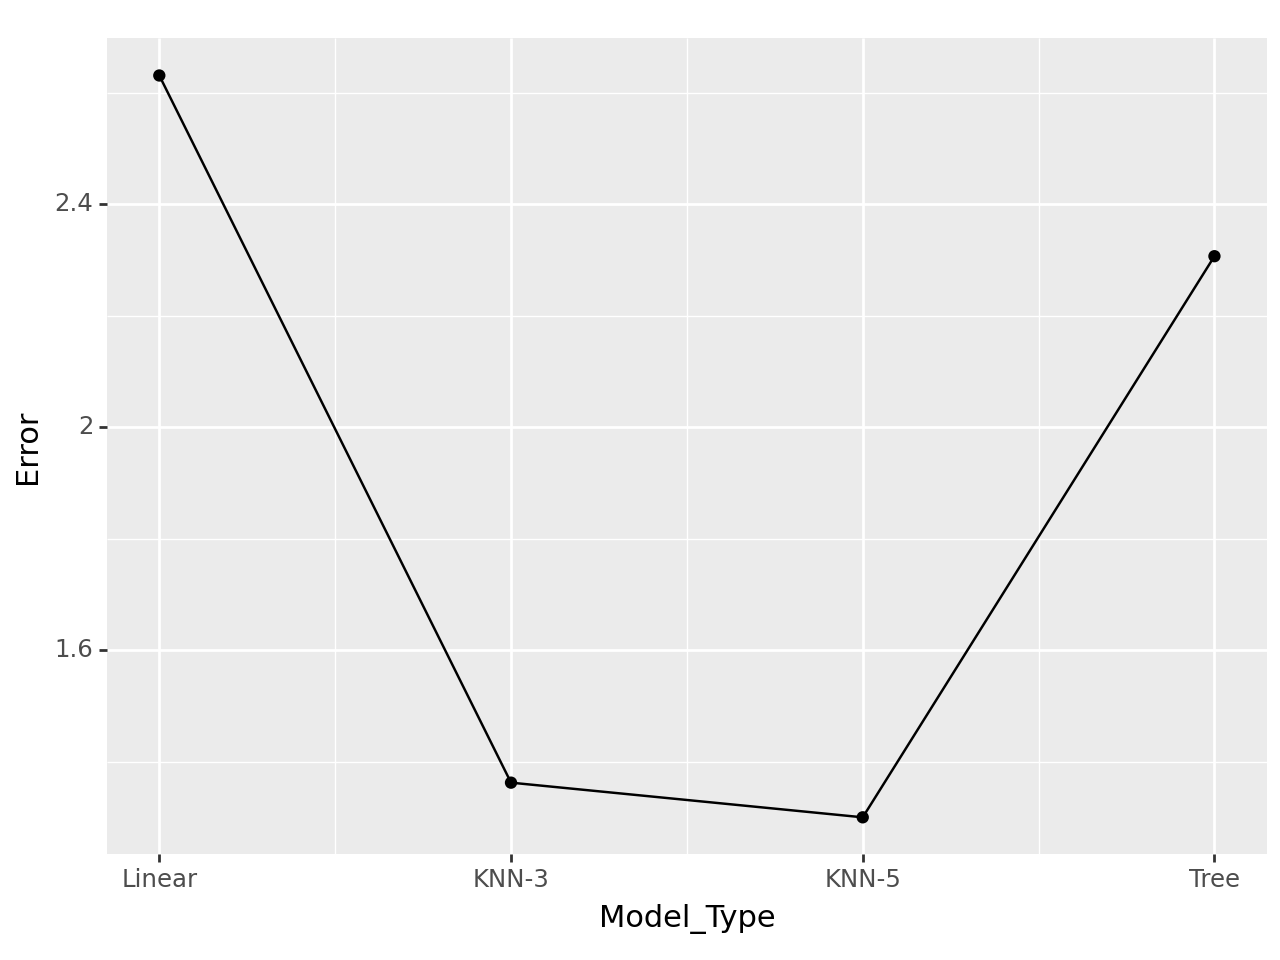

<Figure Size: (640 x 480)>

In [ ]:
import plotnine as p9

labels = ['Linear', 'KNN-3', 'KNN-5', 'Tree']
num = [1,2,3,4]
df = pd.DataFrame(list(zip(num, errors)),
               columns =['Model_Type', 'Error'])

(p9.ggplot(df, p9.aes(x = df["Model_Type"], y = df['Error'])) + p9.geom_point() + p9.geom_line() + p9.scale_x_continuous(labels = labels))

Based on mean squared error, the KNN model with K = 5 did the best.